# 03.2 Say Hello to Pandas!

![hello pandas!](../img/panda.jpg)

The `Pandas` library is an immensely powerful tool for performing analysis on multidimensional (tabular) data in general, and time series data specifically. 

In [1]:
from datetime import datetime
from datetime import timedelta
from dataretrieval import nwis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

startDate = '1960-01-01'
endDate = '2024-12-31'

gage = '13185000' # Boise River Near Twin Springs

## 1. Datetime Objects in `Pandas`

Because it is often used for analyzing time series data, `Pandas` is equipped with many of the same capabilities to work with `datetime` objects and, indeed, extends these capabilities in useful ways. For example, although a bit weird, if we wanted to create a time series of dates with an interval of every 2 weeks, beginning on the first Tuesday after our start date above, we can do so: 

In [2]:
tsDates_2W_Tues = pd.date_range(start=startDate, end=endDate, freq='2W-TUE')
tsDates_2W_Tues

DatetimeIndex(['1960-01-05', '1960-01-19', '1960-02-02', '1960-02-16',
               '1960-03-01', '1960-03-15', '1960-03-29', '1960-04-12',
               '1960-04-26', '1960-05-10',
               ...
               '2024-08-20', '2024-09-03', '2024-09-17', '2024-10-01',
               '2024-10-15', '2024-10-29', '2024-11-12', '2024-11-26',
               '2024-12-10', '2024-12-24'],
              dtype='datetime64[ns]', length=1696, freq='2W-TUE')

Perhaps a bit more useful, but if we wanted to create a time series that started at a particular day and time, but had fifteen minute intervals, we could do something like the following: 

In [3]:
tsDates_15min = pd.date_range(start='2025-10-01 00:00:00', end='2025-10-02 00:00:00', freq='15min')
tsDates_15min

DatetimeIndex(['2025-10-01 00:00:00', '2025-10-01 00:15:00',
               '2025-10-01 00:30:00', '2025-10-01 00:45:00',
               '2025-10-01 01:00:00', '2025-10-01 01:15:00',
               '2025-10-01 01:30:00', '2025-10-01 01:45:00',
               '2025-10-01 02:00:00', '2025-10-01 02:15:00',
               '2025-10-01 02:30:00', '2025-10-01 02:45:00',
               '2025-10-01 03:00:00', '2025-10-01 03:15:00',
               '2025-10-01 03:30:00', '2025-10-01 03:45:00',
               '2025-10-01 04:00:00', '2025-10-01 04:15:00',
               '2025-10-01 04:30:00', '2025-10-01 04:45:00',
               '2025-10-01 05:00:00', '2025-10-01 05:15:00',
               '2025-10-01 05:30:00', '2025-10-01 05:45:00',
               '2025-10-01 06:00:00', '2025-10-01 06:15:00',
               '2025-10-01 06:30:00', '2025-10-01 06:45:00',
               '2025-10-01 07:00:00', '2025-10-01 07:15:00',
               '2025-10-01 07:30:00', '2025-10-01 07:45:00',
               '2025-10-

As we can see, the `date_range` function can help us create a time series at almost any __regular__ interval we want, using the `freq` flag, which is referred to as the offset alias. The following documentation provides a table of different offset aliases: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases and their descriptions. Can you create a time series of objects that have a monthly interval that starts on the first of the month between `startDate` and `endDate`, as defined above?

In [6]:
tsDates = pd.date_range(start=startDate, end=endDate, freq='MS') 
tsDates

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', length=780, freq='MS')

If we wanted a day of the month that was anything other than the start (`freq='MS'`) or end of the month (`freq='ME'`), we can use the function `pd.DateOffset()` to add a specific number of days to each element of our time series. For example, in land modeling we have vegetation leaf area index (LAI) changing on a daily basis, but we only have monthly mean estimates of LAI from satellites. We, therefore, often assume that the value for the monthly mean is valid on the 15th of the month and then interpolate for each day by computing a weighted average of the two nearest months (i.e., the value of LAI on March 16 is the sum of the LAI on March 15 times (30/31) and the LAI on April 15times (1/31)). So, we might need a time series that is monthly in nature, but where the day of the month is 15, instead of 1:

In [7]:
tsDates_midmonth = tsDates + pd.DateOffset(days=14)
tsDates_midmonth

DatetimeIndex(['1960-01-15', '1960-02-15', '1960-03-15', '1960-04-15',
               '1960-05-15', '1960-06-15', '1960-07-15', '1960-08-15',
               '1960-09-15', '1960-10-15',
               ...
               '2024-03-15', '2024-04-15', '2024-05-15', '2024-06-15',
               '2024-07-15', '2024-08-15', '2024-09-15', '2024-10-15',
               '2024-11-15', '2024-12-15'],
              dtype='datetime64[ns]', length=780, freq=None)

Before going further, let's examine the specific data type associated with `tsDates`: 

In [8]:
type(tsDates)

pandas.core.indexes.datetimes.DatetimeIndex

So we can see that this is a special kind of object that is like a standard Python `datetime` object, but is particular to `pandas` indexes. A bit further down, we'll see why this is important. In the mean time, we can use some built-in attributes to access individual elements of the `tsDates` like the month and year. 

In [9]:
tsDates.month

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype='int32', length=780)

In [10]:
tsDates.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', length=780)

If we look at the data type of `tsDates.year` we find that the datatype is still a `pandas` type object: 

In [11]:
type(tsDates.year)

pandas.core.indexes.base.Index

But, if we wanted to perform any mathematical operations on the years, we need to use the `.values` attribute to push the values of `tsDates.year` to a `numpy` array, like so:

In [12]:
WY = tsDates.year.values

Verify that this is, indeed a numpy array: 

In [13]:
type(WY)
WY.shape

(780,)

### Challenge

Run the following code, examine the output and explain what it does:

In [ ]:
# The water year that each month is assigned to.
WY[tsDates.month > 9] = WY[tsDates.month > 9] + 1
WY

array([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1961, 1961,
       1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1962,
       1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962,
       1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963,
       1963, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964,
       1964, 1964, 1965, 1965, 1965, 1965, 1965, 1965, 1965, 1965, 1965,
       1965, 1965, 1965, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966,
       1966, 1966, 1966, 1966, 1967, 1967, 1967, 1967, 1967, 1967, 1967,
       1967, 1967, 1967, 1967, 1967, 1968, 1968, 1968, 1968, 1968, 1968,
       1968, 1968, 1968, 1968, 1968, 1968, 1969, 1969, 1969, 1969, 1969,
       1969, 1969, 1969, 1969, 1969, 1969, 1969, 1970, 1970, 1970, 1970,
       1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1971, 1971, 1971,
       1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1972, 1972,
       1972, 1972, 1972, 1972, 1972, 1972, 1972, 19

## 2. DataFrames in Pandas

Beyond __creating__ time series with Pandas, the primary way that we use Pandas is to deal with tabular data, of which time series data is a special case. For example, let's use the `dataretrieval` library again to get discharge data for the Boise River between our start and end dates. Specifically, let's look at what the `dataretrieval` library returns: 

In [15]:
BoiseRiverQ = nwis.get_dv(sites=gage, parameterCd='00060', start=startDate, end=endDate)[0]
type(BoiseRiverQ)

pandas.core.frame.DataFrame

Let's look at what is inside this `DataFrame`. What does the following look like, or remind you of? 

In [16]:
BoiseRiverQ

,site_no,00060_Mean,00060_Mean_cd
datetime,,,
1960-01-01 00:00:00+00:00,13185000,410.0,A
1960-01-02 00:00:00+00:00,13185000,400.0,A
1960-01-03 00:00:00+00:00,13185000,420.0,A
1960-01-04 00:00:00+00:00,13185000,410.0,A
1960-01-05 00:00:00+00:00,13185000,450.0,A
...,...,...,...
2024-12-27 00:00:00+00:00,13185000,411.0,A
2024-12-28 00:00:00+00:00,13185000,415.0,A
2024-12-29 00:00:00+00:00,13185000,440.0,A


In [17]:
BoiseRiverQ.index

DatetimeIndex(['1960-01-01 00:00:00+00:00', '1960-01-02 00:00:00+00:00',
               '1960-01-03 00:00:00+00:00', '1960-01-04 00:00:00+00:00',
               '1960-01-05 00:00:00+00:00', '1960-01-06 00:00:00+00:00',
               '1960-01-07 00:00:00+00:00', '1960-01-08 00:00:00+00:00',
               '1960-01-09 00:00:00+00:00', '1960-01-10 00:00:00+00:00',
               ...
               '2024-12-22 00:00:00+00:00', '2024-12-23 00:00:00+00:00',
               '2024-12-24 00:00:00+00:00', '2024-12-25 00:00:00+00:00',
               '2024-12-26 00:00:00+00:00', '2024-12-27 00:00:00+00:00',
               '2024-12-28 00:00:00+00:00', '2024-12-29 00:00:00+00:00',
               '2024-12-30 00:00:00+00:00', '2024-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=23742, freq=None)

<Axes: xlabel='datetime'>

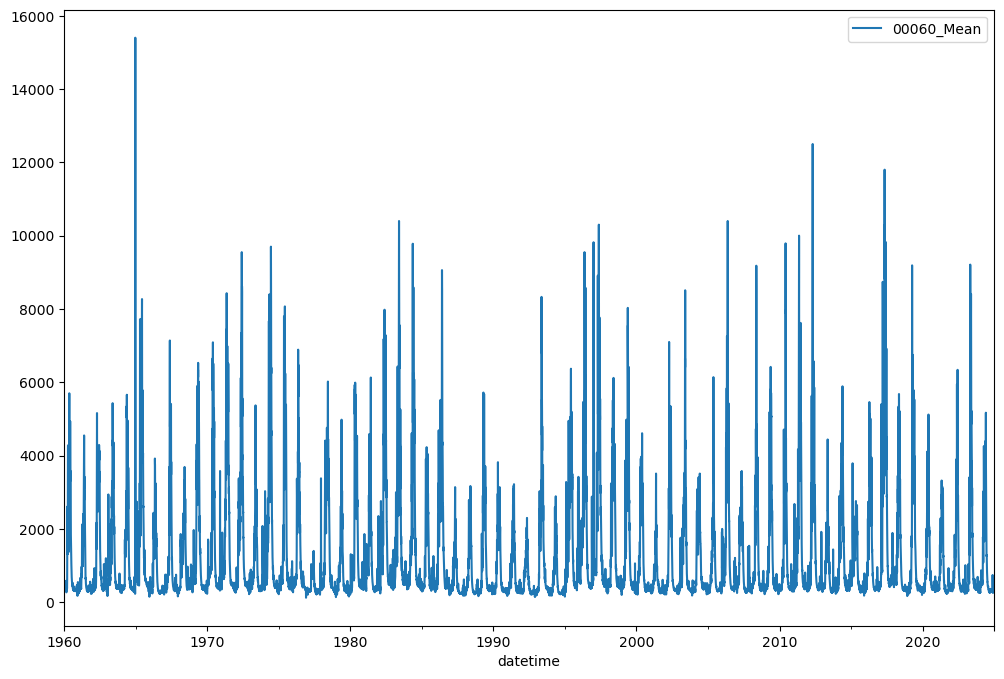

In [18]:
BoiseRiverQ.plot(figsize=(12,8))

### `.groupby()`: The Most Powerful Operator In All of Python and Pandas? 

In the following code below, we use an operator on a `Pandas` dataframe to get the annual maximum value of daily discharge in the Boise River over the period from 1960 to 2024, as well as the unique values of the years. The `.groupby()` operator as used below, effectively tells `Pandas`: "group the column '00060_Mean' by the years in the index of the dataframe (the date), and then for each of those groups, give me the maximum." Ordinarily we would have resorted to writing `for` loops, looping over all years and then getting the maximum value within each year. No need to do so with `Pandas` and this actually reveals something pretty intriguing about modern computation and analysis of large datasets. 

In [19]:
BoiseRiverQ['00060_Mean'].groupby(BoiseRiverQ.index.year)

In [20]:
BoiseRiver_AnnMaxQ = BoiseRiverQ['00060_Mean'].groupby(BoiseRiverQ.index.year).max()
BoiseRiver_year = np.unique(BoiseRiverQ.index.year.values)

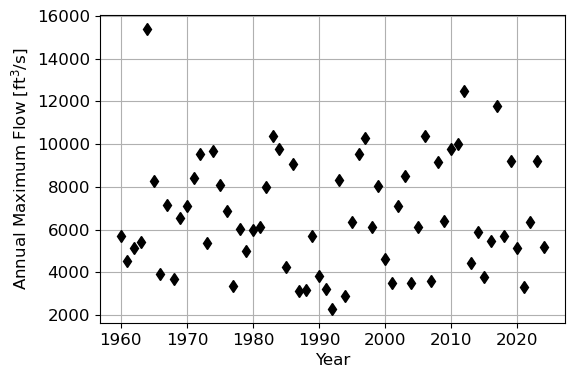

In [23]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,4))
plt.plot(BoiseRiver_year, BoiseRiver_AnnMaxQ, 'kd')
plt.xlabel('Year')
plt.ylabel('Annual Maximum Flow [ft${}^3$/s]')
plt.grid('on')
plt.show()

### Challenge: Mean Monthly Flow

Can you use the `groupby()` function as show below, but instead, use it to compute and plot the mean monthly flow in the Boise River? 

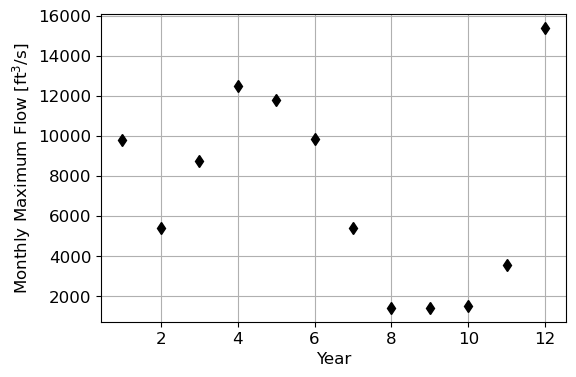

In [24]:
BoiseRiverQ['00060_Mean'].groupby(BoiseRiverQ.index.month)

BoiseRiver_AnnMaxQ = BoiseRiverQ['00060_Mean'].groupby(BoiseRiverQ.index.month).max()
BoiseRiver_year = np.unique(BoiseRiverQ.index.month.values)

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,4))
plt.plot(BoiseRiver_year, BoiseRiver_AnnMaxQ, 'kd')
plt.xlabel('Year')
plt.ylabel('Monthly Maximum Flow [ft${}^3$/s]')
plt.grid('on')
plt.show()